<a href="https://colab.research.google.com/github/balu337/LendingClubRepo/blob/master/LC_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ImportStatments**

In [130]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)

#Unique values

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
#filepath="/content/drive/MyDrive/IITB_AIML/1_Statistics/LendingClubCaseStudy/loan.csv"
filepath="/content/drive/MyDrive/LendingClub/loan.csv"


df = pd.read_csv(filepath)

## **Analyze Raw Data**

Check column by column using Data Dictionary and get unerstanding the data ( content and type )

In [133]:
#Dataset Shape
df.shape

(39717, 111)

In [134]:
#Description of dataset
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [135]:
#Display information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [136]:
#Find datatypes of columns
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [137]:
#Get All Column Names

col= list(df.columns)
print("# Columns are ", len(col))
print("Columns are ", col)

# Columns are  111
Columns are  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open

### Creating new dataframe for Analysis

In [138]:
#Removing unwanted columns

# #After basic analysis columns after [ annual_inc_joint ] are not useful as there is not data.

# print("-->",col[53])
# columns_removed=col[53:]
# print("removed col ",columns_removed)
# df1=df.drop(columns_removed,axis=1)

# Lets drop columns with all null values
df1=df.dropna(axis=1, how='all')
df1.shape



(39717, 57)

In [139]:
#Dropping id with loan status =CUrrent as we dont know how the loan will be closed


df1 = df1[df1.loan_status != "Current"]
df1.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [140]:
# If we observe there are few columns have sigle values, those are not helpful for analysis lets drop them

#check how many single value columns are there
# print((df1.nunique()==1).sum())
# print(df1[nunique()==1])
un=df1.nunique()==1
single_unique_cols = list( un[un].index )
print(single_unique_cols)



['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [141]:
df1.drop(columns= single_unique_cols, inplace=True)

#Print Shape
df1.shape

(38577, 46)

In [142]:
#Get  Column afte dropping columns after annual_inc_joint

col1= list(df1.columns)
print("# Columns are ", len(col1))
print("Columns are ", col1)




# Columns are  46
Columns are  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status      38

In [144]:
df1.isnull().mean()*100

id                           0.000000
member_id                    0.000000
loan_amnt                    0.000000
funded_amnt                  0.000000
funded_amnt_inv              0.000000
term                         0.000000
int_rate                     0.000000
installment                  0.000000
grade                        0.000000
sub_grade                    0.000000
emp_title                    6.185033
emp_length                   2.677761
home_ownership               0.000000
annual_inc                   0.000000
verification_status          0.000000
issue_d                      0.000000
loan_status                  0.000000
url                          0.000000
desc                        32.477901
purpose                      0.000000
title                        0.028514
zip_code                     0.000000
addr_state                   0.000000
dti                          0.000000
delinq_2yrs                  0.000000
earliest_cr_line             0.000000
inq_last_6mt

Dropping colmns with null values more than 40%.

**Columns                   % of Null Values**


1.   mths_since_last_delinq     64.662487
2.   mths_since_last_record     92.985372
3.   next_pymnt_d               97.129693







In [145]:
null_percentage = df1.isnull().mean() * 100

# Identify columns where the percentage of null values is greater than 40%
columns_to_drop = null_percentage[null_percentage > 40].index

# Drop these columns from the DataFrame
df1 = df1.drop(columns=columns_to_drop)



In [146]:
#Finding Shape after removig columns with null > 40%
df1.shape
df1.isnull().mean()*100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.185033
emp_length                  2.677761
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.477901
purpose                     0.000000
title                       0.028514
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

### Questions

In [147]:
# Do we need Emp title ?


## **Cleansing Data**


* Find Shape of data
* Check for Null columns and cells
* For numeric data use either median ( mostly ) or mode as required
* For categorical data use Mode

** Remove Unwanted colums**

In [148]:
df1 = df1.drop(columns=['desc','title','url'])

 **Fix the Fromat of the columns by conversion where its required. e,g Emp_lenght need to be converted to int**

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status      38

In [150]:
#Identify the columns whcih need to be in Date Fomrat
#issue_d
 #earliest_cr_line

#last_pymnt_d
#last_credit_pull_d

#Identify whihc clumsn need to be in int format

#term need to be converted to mumeric
#int_rate     remove %
#emp_length               need to be in numeric

#revol_util

In [151]:
#function to covert the object to date column

def toDate(cObj):
  x=cObj
  return x



In [152]:
# Identify columns where the percentage of null values is greater than 40%

null_percentage = df1.isnull().mean() * 100
cnd = null_percentage[(null_percentage < 40) & (null_percentage != 0)].index


df1[cnd].isnull().mean()*100

emp_title               6.185033
emp_length              2.677761
revol_util              0.129611
last_pymnt_d            0.184047
last_credit_pull_d      0.005184
pub_rec_bankruptcies    1.806776
dtype: float64

Review these null values at End #404

emp_title                6.191303
desc                    32.585543
title                    0.027696

last_pymnt_d             0.178765
last_credit_pull_d       0.005036
pub_rec_bankruptcies     1.754916


NOt able to decide is we can drop or not


In [153]:
#emp_lenght is  2.706650 null. Filling it with Median
#revol_util               0.125891
#examine the data in the column

df1.emp_length.unique()
df1.emp_length.nunique()
df1.emp_length.value_counts()


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [154]:
# Convert Object to int

def removeLeftChar(input, numofchar):
  ans =input[numofchar:]
  return ans


def removeRighttChar(input, numofchar):
  input = str(input)
  ans =input[:len(input)-numofchar]

  return ans


def removeLastChar(input):
  if (pd.isna(input)):
    ans = input
  else:
    ans = removeRighttChar(input,1)
  return ans

#print(removeLeftChar(">1",1))
#print(removeRighttChar("50%",1))



def getYears(x):
  if isinstance(x, str):
    xlist=x.split(" ")
  else:
    xlist = []


  if(len(xlist) == 3):
    ans=0
  elif (len(xlist) == 2):
    ans=int(x.split(" ")[0][:2])
  elif pd.isna(x):
    ans=x
  else:
      ans=int(x)
  return ans





In [155]:

# Convert object columns to datetime
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
df1[date_columns] = df1[date_columns].apply(pd.to_datetime, format='%b-%y')


In [156]:
# Convertng Object to int
df1['emp_length'] =  df1['emp_length'].apply(getYears)

In [157]:
#int_rate     remove %
df1['int_rate'] =   df1['int_rate'].apply(removeLastChar).astype(float)

#int_rate     remove %
df1['revol_util'] =  df1['revol_util'].apply(removeLastChar).astype(float)

In [158]:
df1['revol_util'].head()


0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [159]:
df1['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [160]:
#Identify the columns whcih need to be in Date Fomrat
#issue_d   #earliest_cr_line   #last_pymnt_d    #last_credit_pull_d
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  int64         
 1   member_id                38577 non-null  int64         
 2   loan_amnt                38577 non-null  int64         
 3   funded_amnt              38577 non-null  int64         
 4   funded_amnt_inv          38577 non-null  float64       
 5   term                     38577 non-null  object        
 6   int_rate                 38577 non-null  float64       
 7   installment              38577 non-null  float64       
 8   grade                    38577 non-null  object        
 9   sub_grade                38577 non-null  object        
 10  emp_title                36191 non-null  object        
 11  emp_length               37544 non-null  float64       
 12  home_ownership           38577 non-nu

In [161]:
df1.home_ownership.unique()
df1.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [162]:
#Replace NONE wih Others
df1['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)


In [163]:
df1.emp_length.unique()
df1.emp_length.value_counts()

emp_length
10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [164]:
#Find the median of the emp_length
import math

expmedian= math.trunc(int(df1.emp_length.median()))
print(math.trunc(expmedian))

df1.emp_length.isnull().sum()

df1.emp_length=df1.emp_length.fillna(math.trunc(expmedian))
df1.emp_length.value_counts()

4


emp_length
10.0    8488
0.0     4508
4.0     4375
2.0     4291
3.0     4012
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [165]:
#removing columns as we might not be using it.
#Check why there is an error commenting for now
#df1=df1.drop(['mths_since_last_record','next_pymnt_d'],axis=1)

In [166]:
df1.loan_status.unique()
df1.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

# **Data Preperation**

Adding dervied  columns


In [167]:
# Creating Two new columsn to get year and month stored

df1['issue_year']=df1['issue_d'].dt.year
df1['issue_month']=df1['issue_d'].dt.month

## **Univariate Analysis**

* Identify the columns to be Analyzed
* Generate plots ( Bar , Box Plot and Histogram )
* Review each column and *remove outliers


##Segmentation

In [168]:
df1.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,863.16,0.0,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,2011,12
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,12
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,605.67,0.0,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,2011,12


In [169]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month'],
      dtype='object')

In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  int64         
 1   member_id                38577 non-null  int64         
 2   loan_amnt                38577 non-null  int64         
 3   funded_amnt              38577 non-null  int64         
 4   funded_amnt_inv          38577 non-null  float64       
 5   term                     38577 non-null  object        
 6   int_rate                 38577 non-null  float64       
 7   installment              38577 non-null  float64       
 8   grade                    38577 non-null  object        
 9   sub_grade                38577 non-null  object        
 10  emp_title                36191 non-null  object        
 11  emp_length               38577 non-null  float64       
 12  home_ownership           38577 non-nu

## **Segmentation**

In [171]:

num_cols=['funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','earliest_cr_line','open_acc',
'dti','revol_bal','revol_util','total_acc','issue_month','loan_amnt' ,'earliest_cr_line','issue_d']

cat_cols=[ 'term', 'grade','sub_grade', 'home_ownership','verification_status','loan_status', 'purpose','addr_state','emp_length','inq_last_6mths','pub_rec','pub_rec_bankruptcies','issue_year' ]

extra_col =['id', 'member_id', 'total_pymnt_inv','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','emp_title','delinq_2yrs']



# Univariate Analysis

### Numerical Columns Analysis

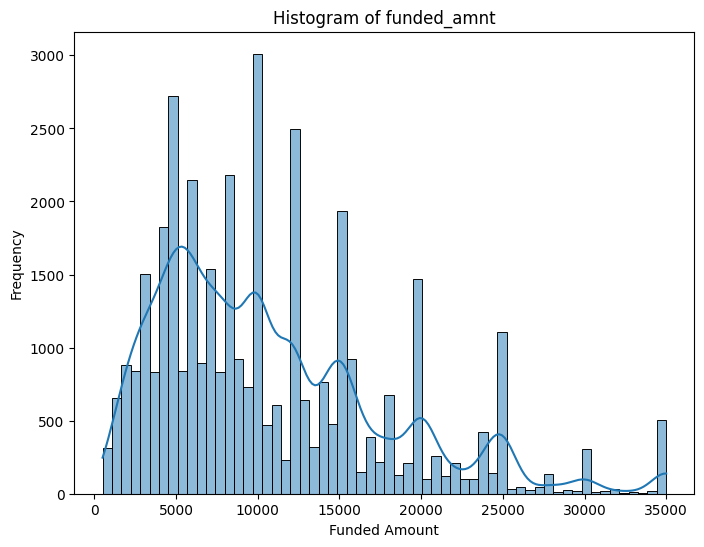

In [172]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.histplot(df1['funded_amnt'], kde=True)  # Generate histogram plot
plt.title('Histogram of funded_amnt')  # Set title
plt.xlabel('Funded Amount')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.show()

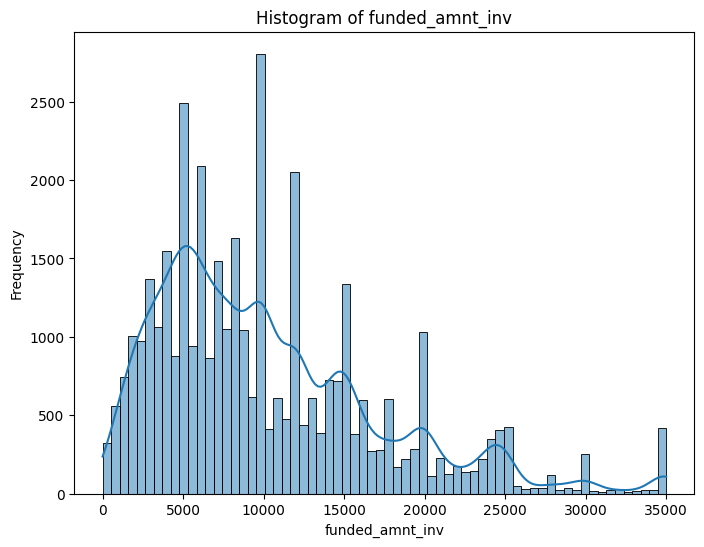

In [173]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.histplot(df1['funded_amnt_inv'], kde=True)  # Generate histogram plot
plt.title('Histogram of funded_amnt_inv')  # Set title
plt.xlabel('funded_amnt_inv')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.show()

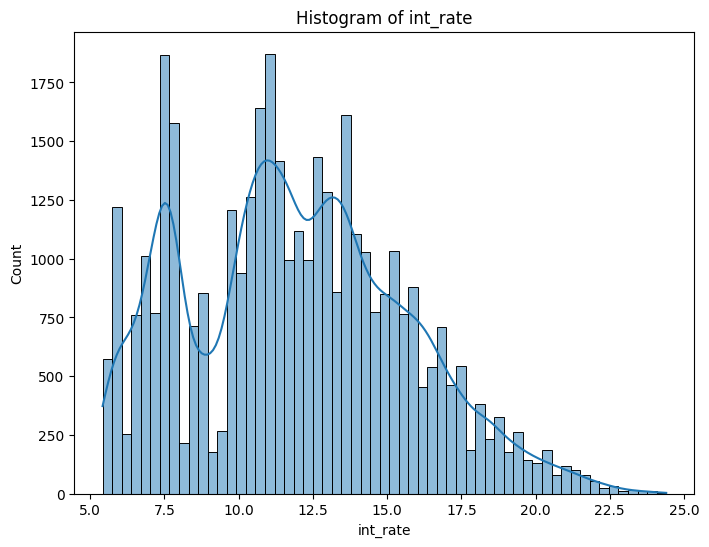

In [174]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.histplot(df1['int_rate'], kde=True)  # Generate histogram plot
plt.title('Histogram of int_rate')  # Set title
# plt.xlabel('int_rate')  # Set x-axis label
# plt.ylabel('Frequency')  # Set y-axis label
plt.show()

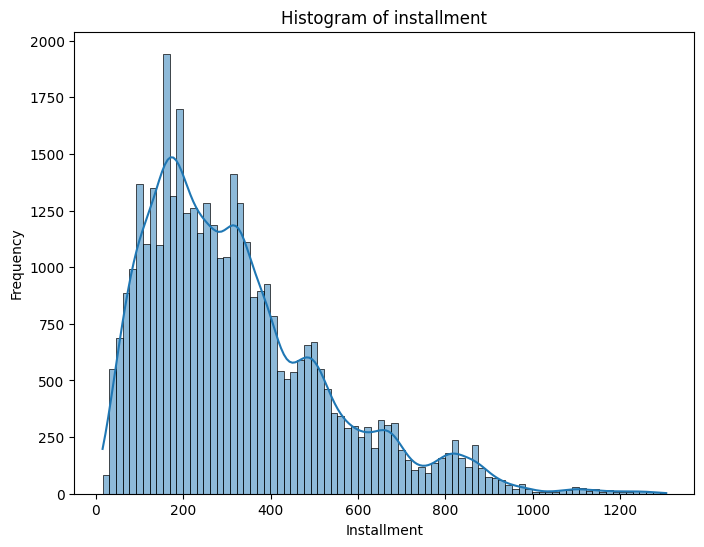

In [175]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Generate histogram plot for 'installment'
sns.histplot(df1['installment'], kde=True)
plt.title('Histogram of installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

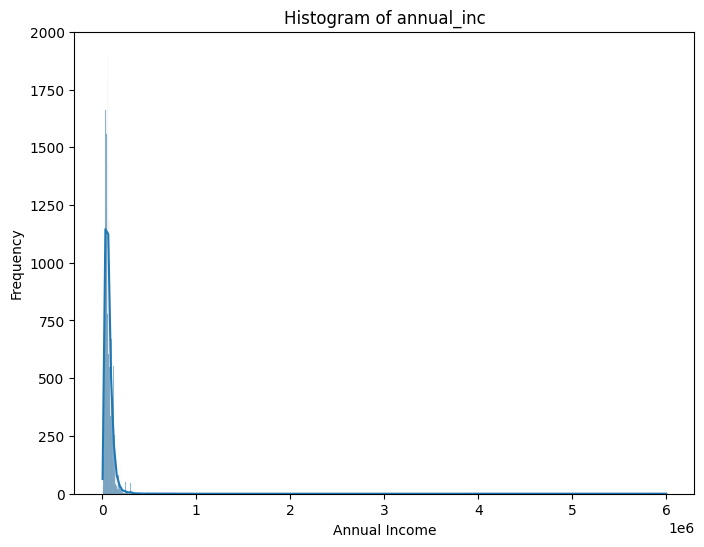

In [176]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['annual_inc'], kde=True)
plt.title('Histogram of annual_inc')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

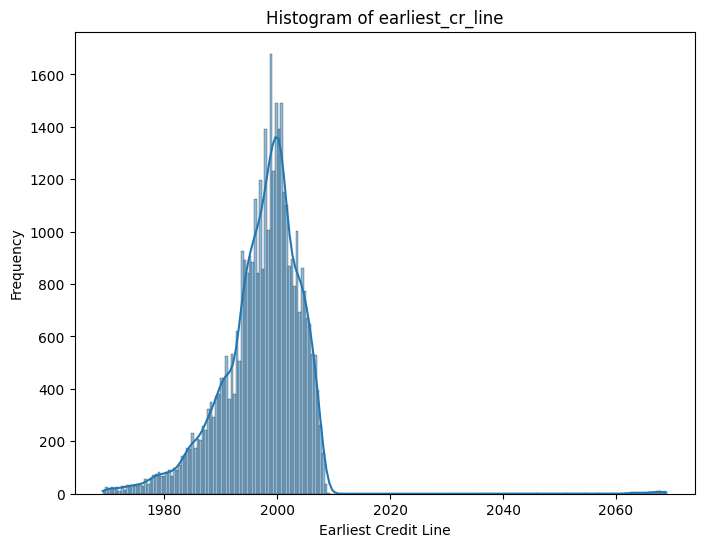

In [177]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['earliest_cr_line'], kde=True)
plt.title('Histogram of earliest_cr_line')
plt.xlabel('Earliest Credit Line')
plt.ylabel('Frequency')
plt.show()

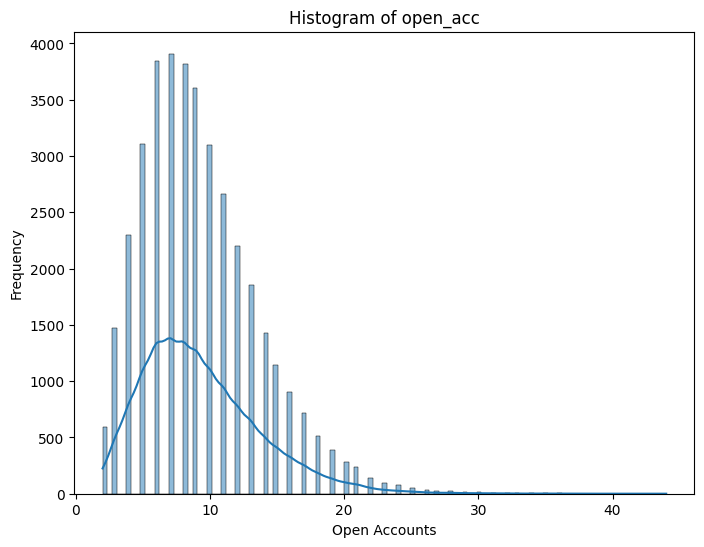

In [178]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['open_acc'], kde=True)
plt.title('Histogram of open_acc')
plt.xlabel('Open Accounts')
plt.ylabel('Frequency')
plt.show()

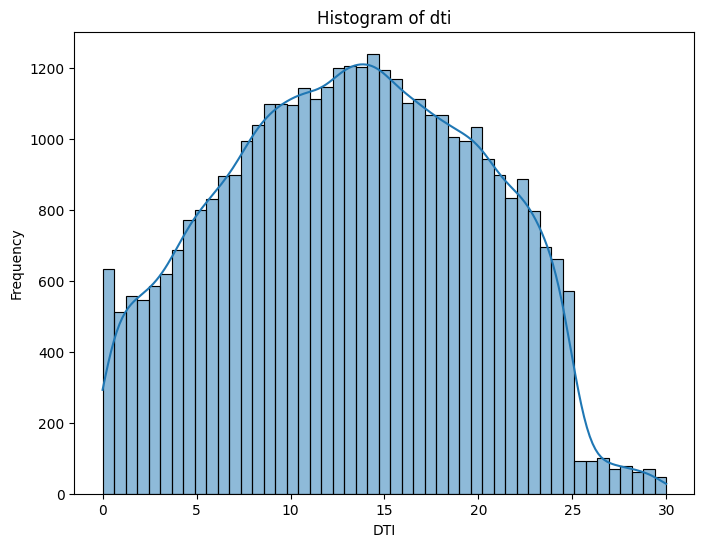

In [179]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Generate histogram plot for 'dti'
sns.histplot(df1['dti'], kde=True)
plt.title('Histogram of dti')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

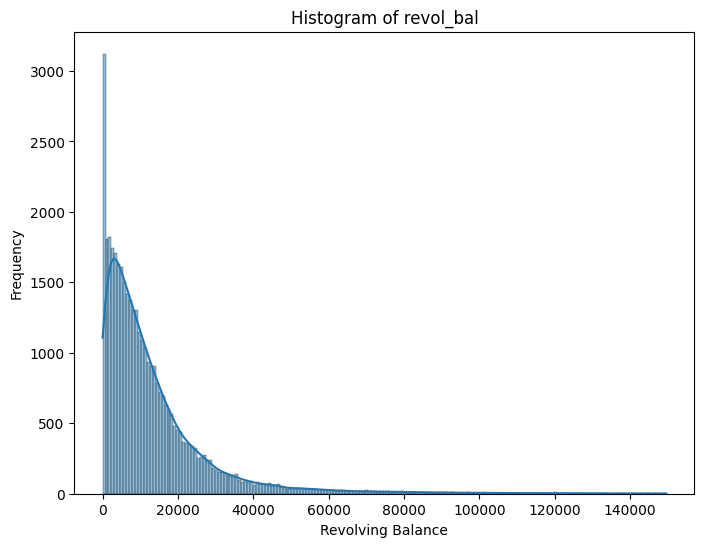

In [180]:
plt.figure(figsize=(8, 6))
# Generate histogram plot for 'revol_bal'
sns.histplot(df1['revol_bal'], kde=True)
plt.title('Histogram of revol_bal')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.show()

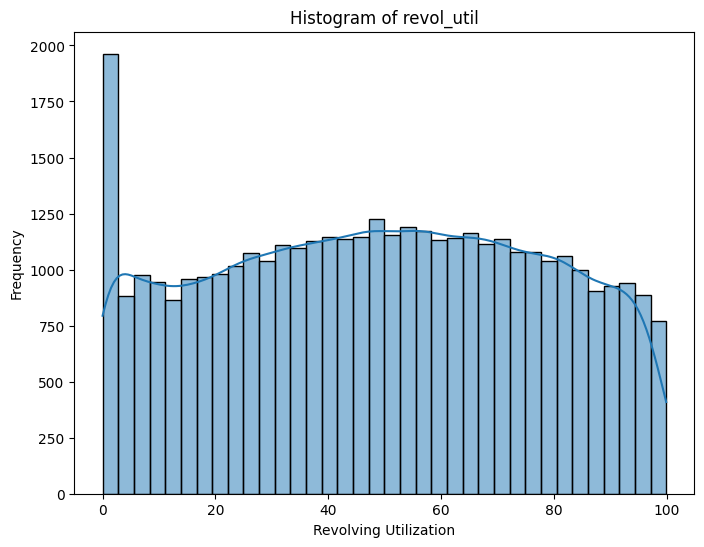

In [181]:
plt.figure(figsize=(8, 6))
# Generate histogram plot for 'revol_util'
sns.histplot(df1['revol_util'], kde=True)
plt.title('Histogram of revol_util')
plt.xlabel('Revolving Utilization')
plt.ylabel('Frequency')
plt.show()

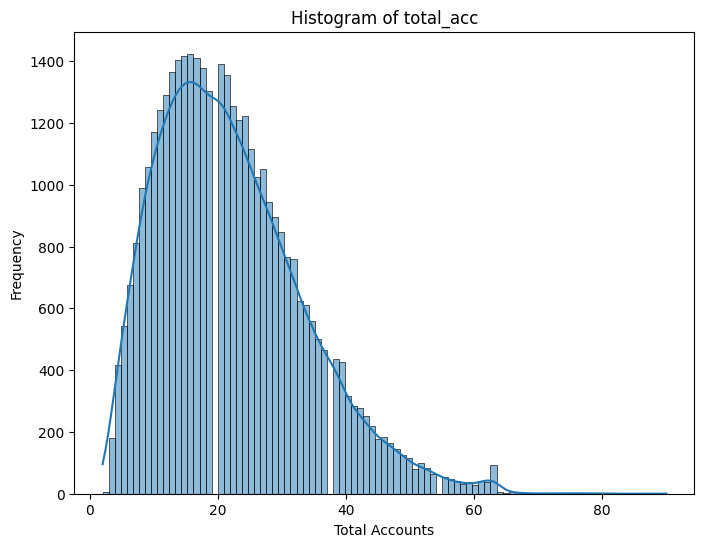

In [182]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Generate histogram plot for 'total_acc'
sns.histplot(df1['total_acc'], kde=True)
plt.title('Histogram of total_acc')
plt.xlabel('Total Accounts')
plt.ylabel('Frequency')
plt.show()

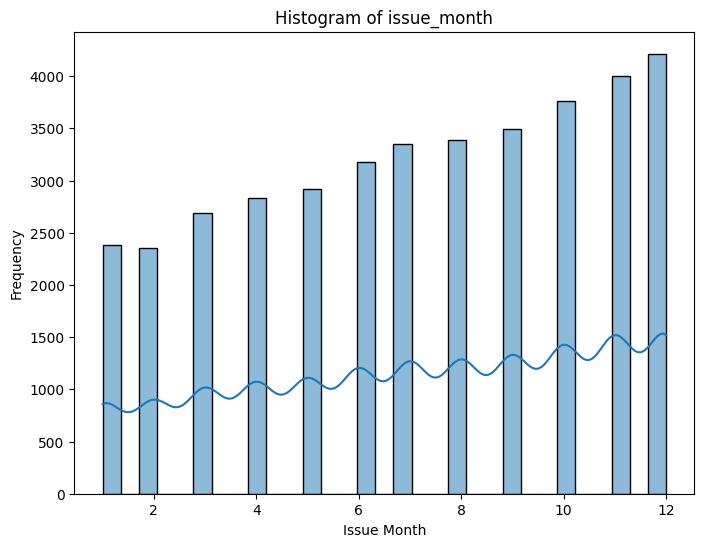

In [183]:
plt.figure(figsize=(8, 6))
# Generate histogram plot for 'issue_month'
sns.histplot(df1['issue_month'], kde=True)
plt.title('Histogram of issue_month')
plt.xlabel('Issue Month')
plt.ylabel('Frequency')
plt.show()

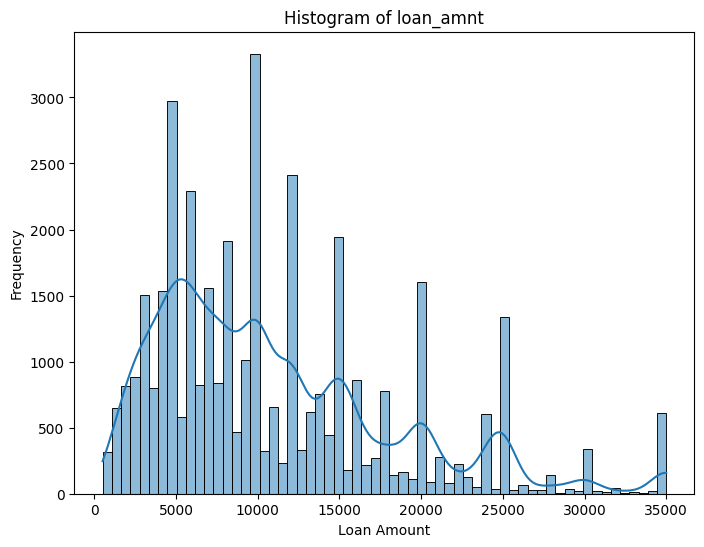

In [184]:
plt.figure(figsize=(8, 6))
# Generate histogram plot for 'loan_amnt'
sns.histplot(df1['loan_amnt'], kde=True)
plt.title('Histogram of loan_amnt')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

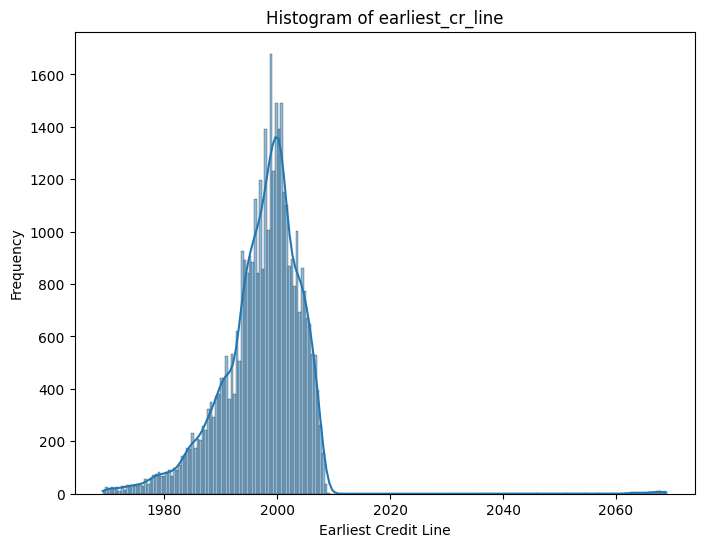

In [185]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['earliest_cr_line'], kde=True)
plt.title('Histogram of earliest_cr_line')
plt.xlabel('Earliest Credit Line')
plt.ylabel('Frequency')
plt.show()


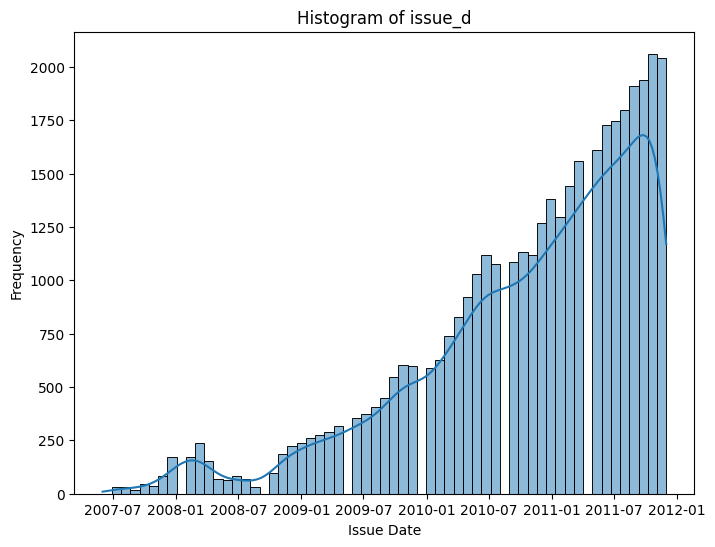

In [186]:
plt.figure(figsize=(8, 6))
# Generate histogram plot for 'issue_d'
sns.histplot(df1['issue_d'], kde=True)
plt.title('Histogram of issue_d')
plt.xlabel('Issue Date')
plt.ylabel('Frequency')
plt.show()

# Outlier removal

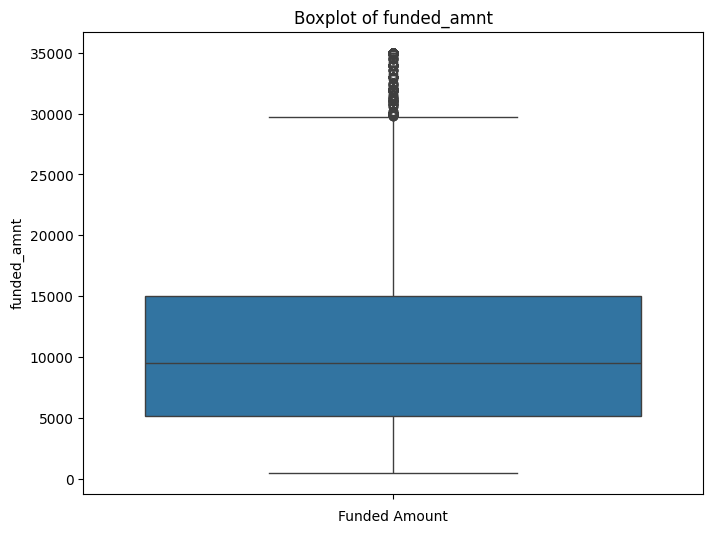

In [187]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['funded_amnt'])
plt.title('Boxplot of funded_amnt')  # Set title
plt.xlabel('Funded Amount')  # Set x-axis label
plt.show()

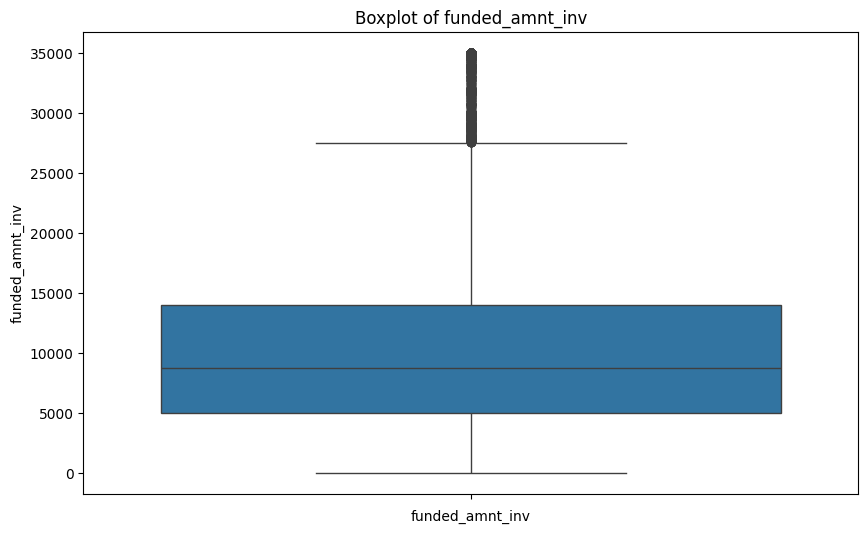

In [188]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(df1['funded_amnt_inv'])
plt.title('Boxplot of funded_amnt_inv')  # Set title
plt.xlabel('funded_amnt_inv')  # Set x-axis label
plt.show()

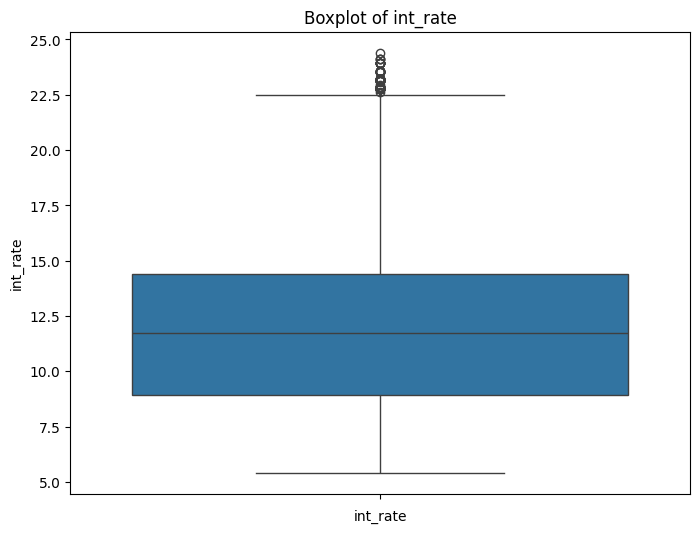

In [189]:

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['int_rate'])  # Generate plot
plt.title('Boxplot of int_rate')  # Set title
plt.xlabel('int_rate')  # Set x-axis label
plt.show()


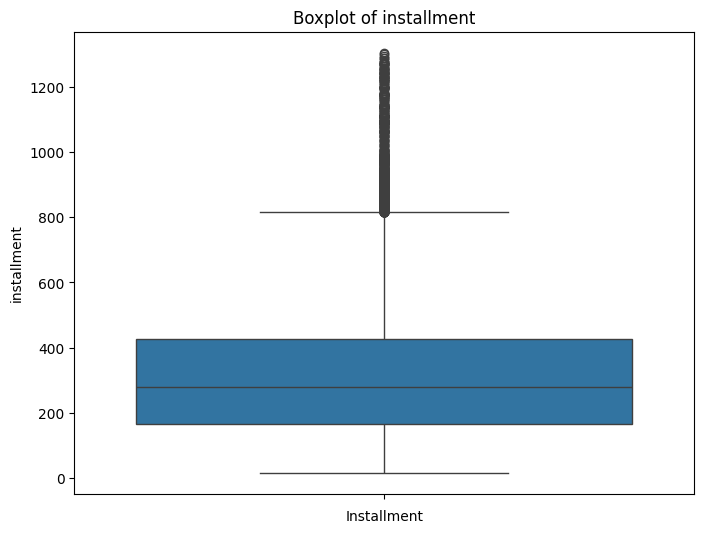

In [190]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Generate Box plot for 'installment'
sns.boxplot(df1['installment'])
plt.title('Boxplot of installment')
plt.xlabel('Installment')
plt.show()

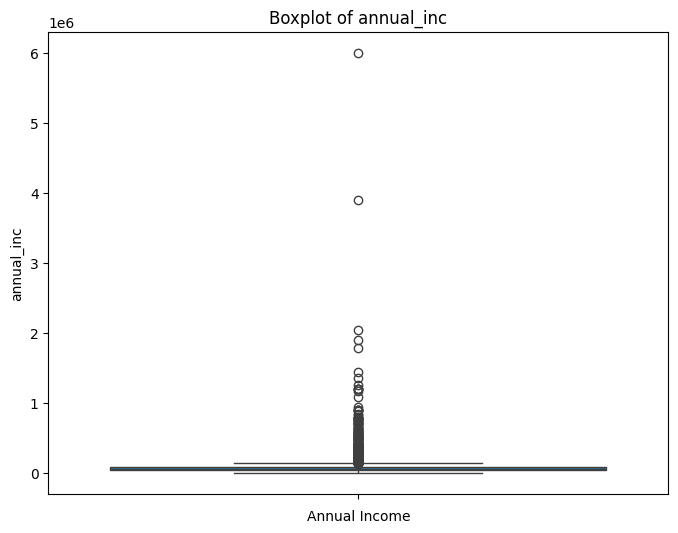

In [191]:
plt.figure(figsize=(8, 6))
sns.boxplot(df1['annual_inc'])
plt.title('Boxplot of annual_inc')
plt.xlabel('Annual Income')
plt.show()

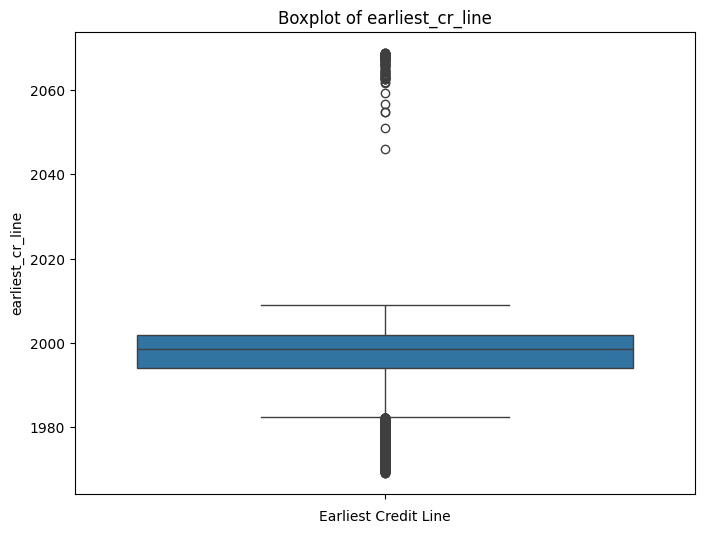

In [192]:

plt.figure(figsize=(8, 6))
sns.boxplot(df1['earliest_cr_line'])
plt.title('Boxplot of earliest_cr_line')
plt.xlabel('Earliest Credit Line')
plt.show()

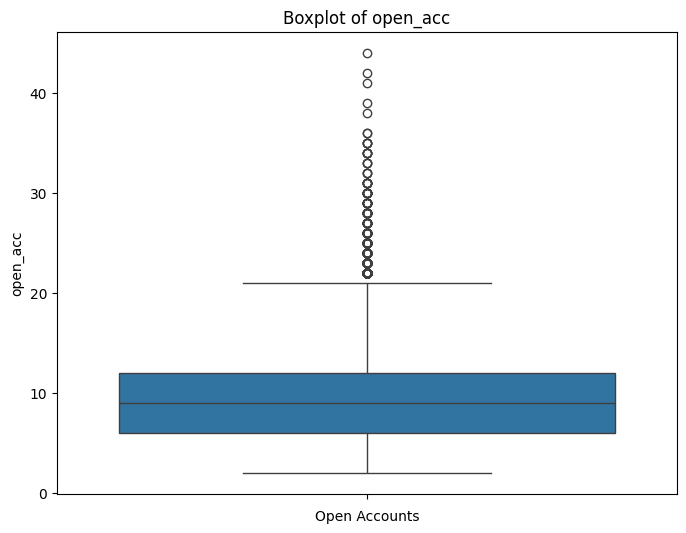

In [193]:
plt.figure(figsize=(8, 6))
sns.boxplot(df1['open_acc'])
plt.title('Boxplot of open_acc')
plt.xlabel('Open Accounts')
plt.show()


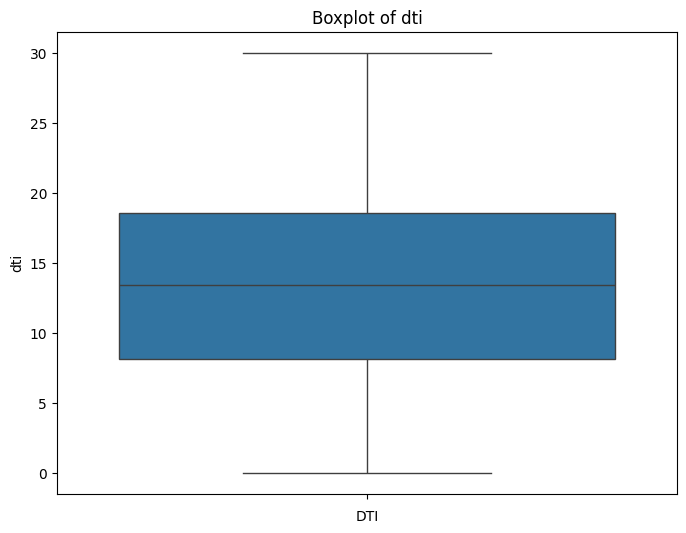

In [194]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Generate Box plot for 'dti'
sns.boxplot(df1['dti'])
plt.title('Boxplot of dti')
plt.xlabel('DTI')
plt.show()

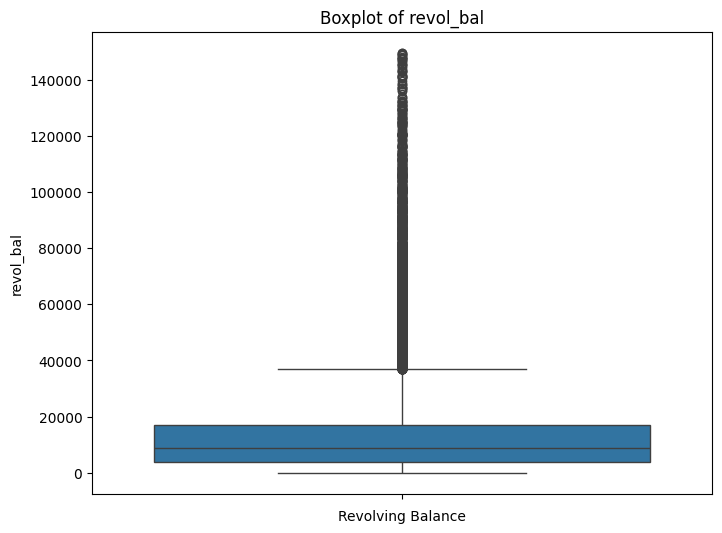

In [196]:
plt.figure(figsize=(8, 6))
# Generate Box plot for 'revol_bal'
sns.boxplot(df1['revol_bal'])
plt.title('Boxplot of revol_bal')
plt.xlabel('Revolving Balance')
plt.show()

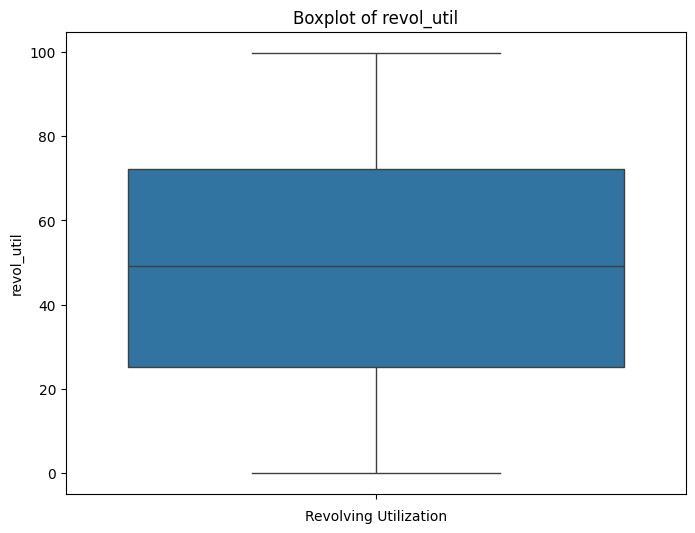

In [197]:
plt.figure(figsize=(8, 6))
# Generate Box plot for 'revol_util'
sns.boxplot(df1['revol_util'])
plt.title('Boxplot of revol_util')
plt.xlabel('Revolving Utilization')
plt.show()

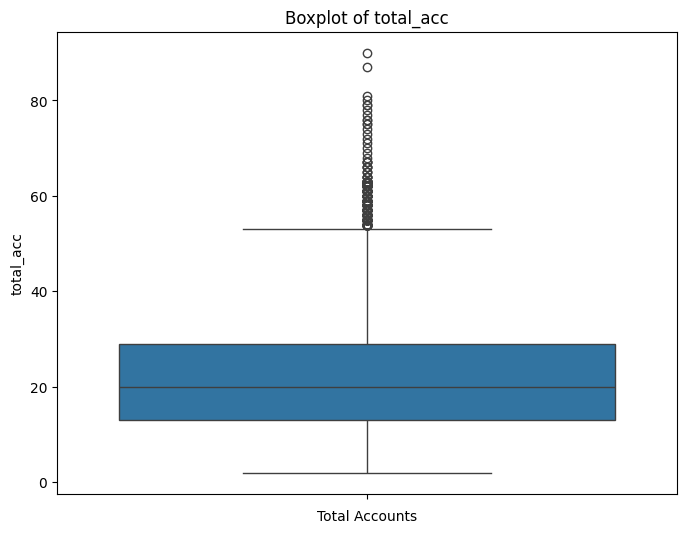

In [199]:

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Generate histogram plot for 'total_acc'
sns.boxplot(df1['total_acc'])
plt.title('Boxplot of total_acc')
plt.xlabel('Total Accounts')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
# Generate histogram plot for 'issue_month'
sns.boxplot(df1['issue_month'])
plt.title('Boxplot of issue_month')
plt.xlabel('Issue Month')
plt.show()


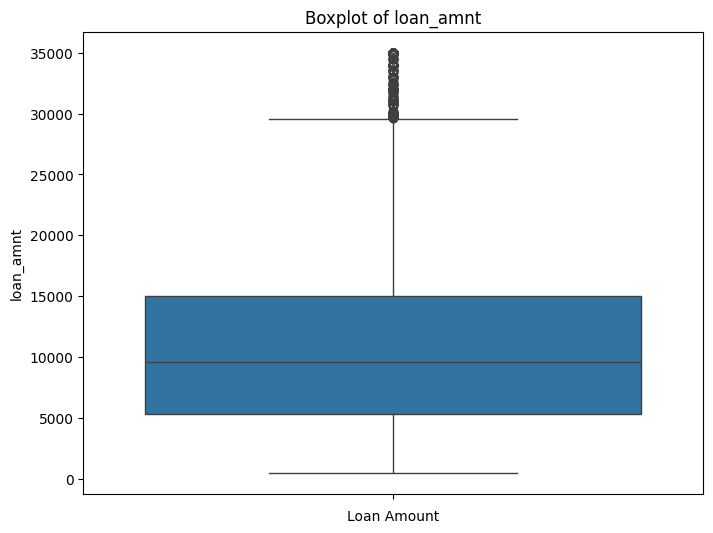

In [201]:
plt.figure(figsize=(8, 6))
# Generate Box plot for 'loan_amnt'
sns.boxplot(df1['loan_amnt'])
plt.title('Boxplot of loan_amnt')
plt.xlabel('Loan Amount')
plt.show()

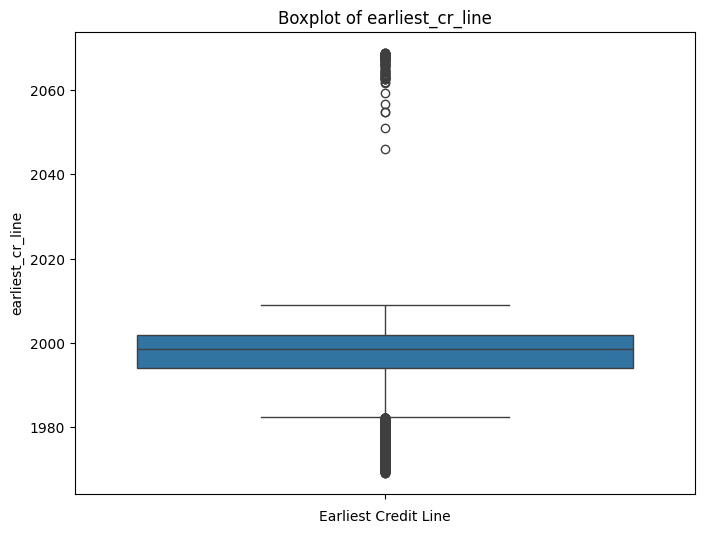

In [202]:
plt.figure(figsize=(8, 6))
sns.boxplot(df1['earliest_cr_line'])
plt.title('Boxplot of earliest_cr_line')
plt.xlabel('Earliest Credit Line')
plt.show()

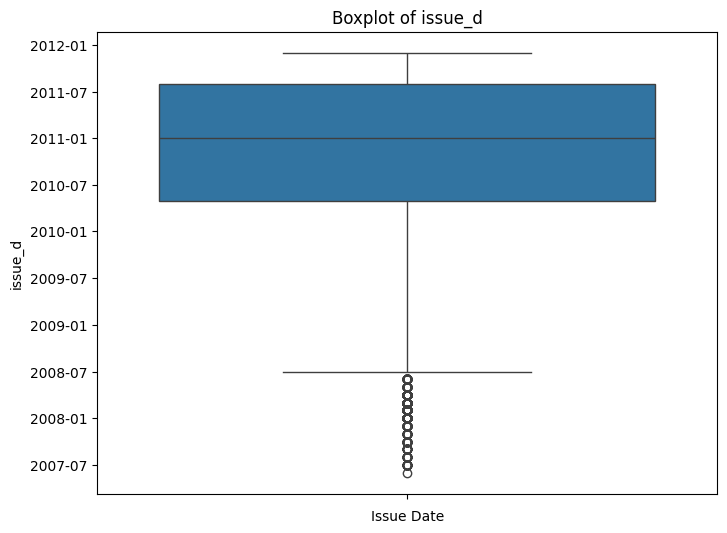

In [203]:
plt.figure(figsize=(8, 6))
# Generate Box plot for 'issue_d'
sns.boxplot(df1['issue_d'])
plt.title('Boxplot of issue_d')
plt.xlabel('Issue Date')
plt.show()

# For Categorical Columns

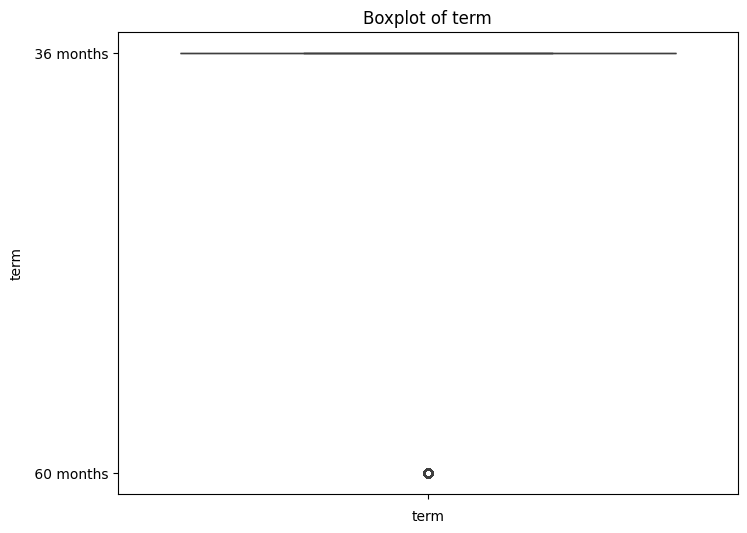

In [204]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['term'])
plt.title('Boxplot of term')  # Set title
plt.xlabel('term')  # Set x-axis label
plt.show()

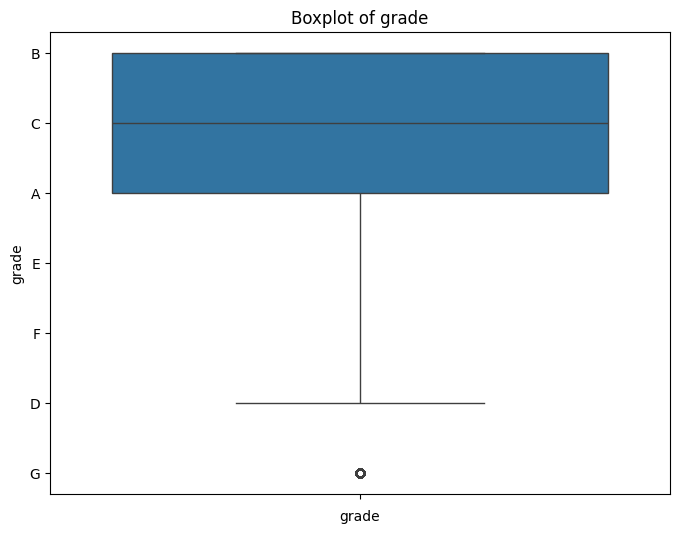

In [205]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['grade'])
plt.title('Boxplot of grade')  # Set title
plt.xlabel('grade')  # Set x-axis label
plt.show()

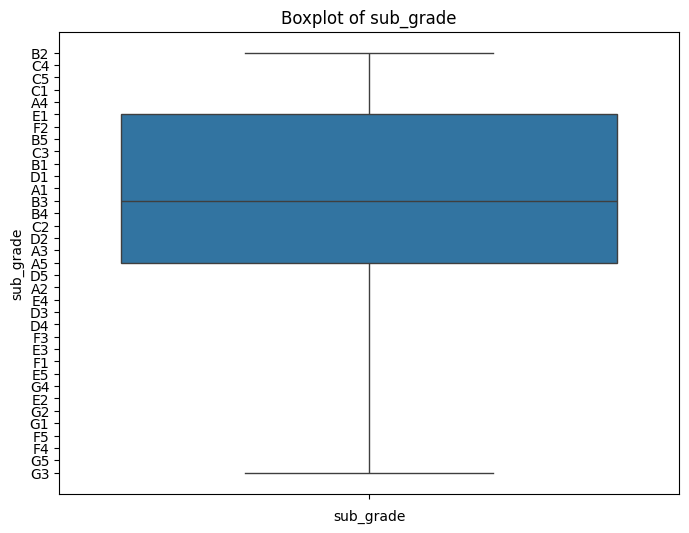

In [206]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['sub_grade'])
plt.title('Boxplot of sub_grade')  # Set title
plt.xlabel('sub_grade')  # Set x-axis label
plt.show()

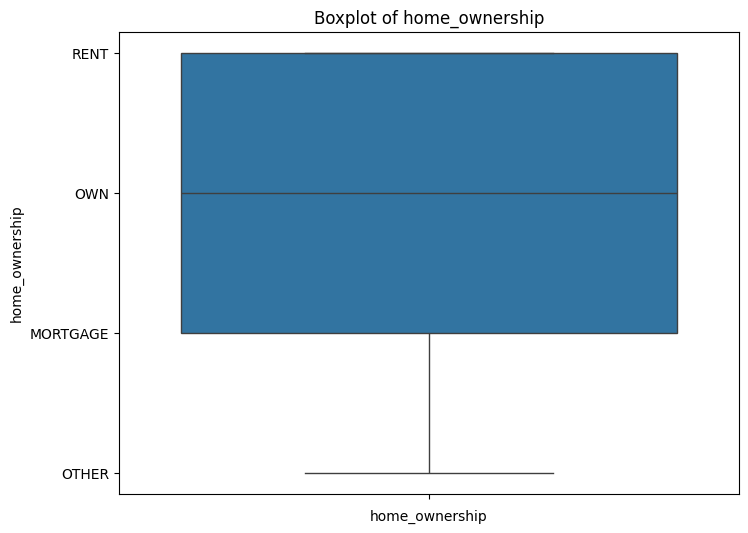

In [207]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['home_ownership'])
plt.title('Boxplot of home_ownership')  # Set title
plt.xlabel('home_ownership')  # Set x-axis label
plt.show()

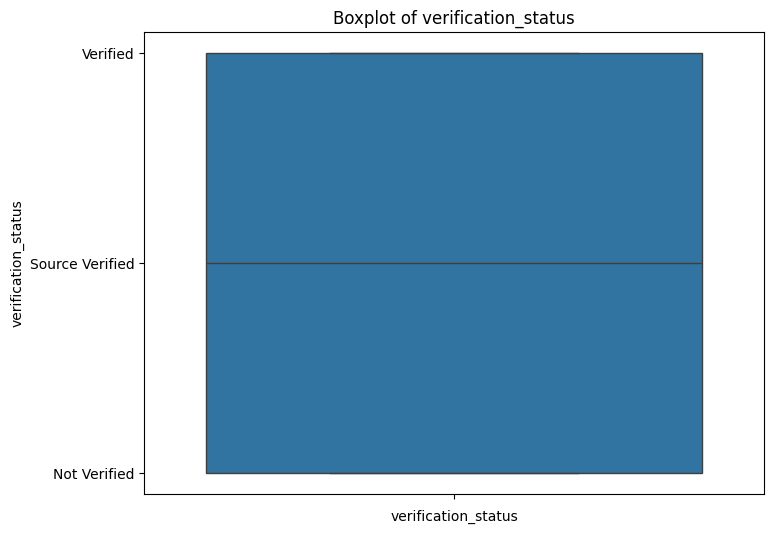

In [210]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['verification_status'])
plt.title('Boxplot of verification_status')  # Set title
plt.xlabel('verification_status')  # Set x-axis label
plt.show()

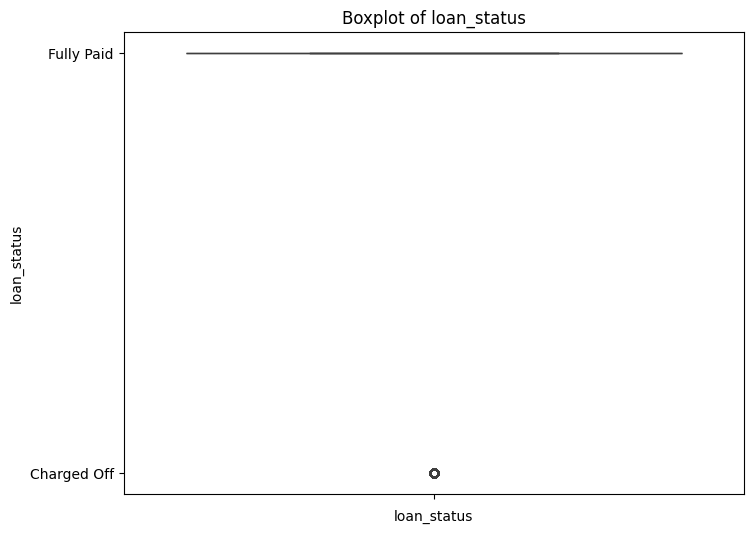

In [209]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['loan_status'])
plt.title('Boxplot of loan_status')  # Set title
plt.xlabel('loan_status')  # Set x-axis label
plt.show()

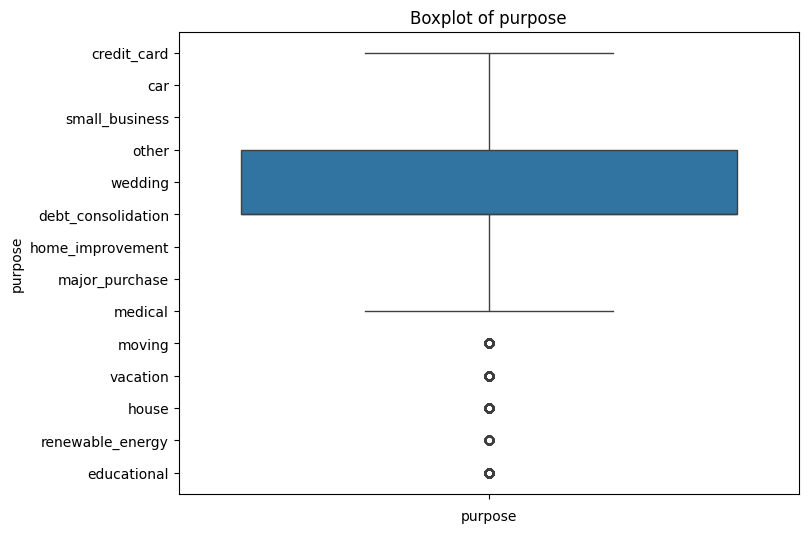

In [211]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['purpose'])
plt.title('Boxplot of purpose')  # Set title
plt.xlabel('purpose')  # Set x-axis label
plt.show()

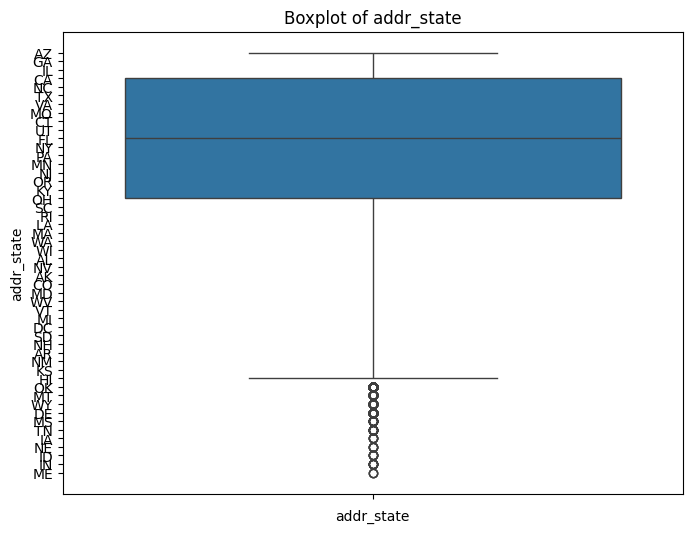

In [212]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['addr_state'])
plt.title('Boxplot of addr_state')  # Set title
plt.xlabel('addr_state')  # Set x-axis label
plt.show()

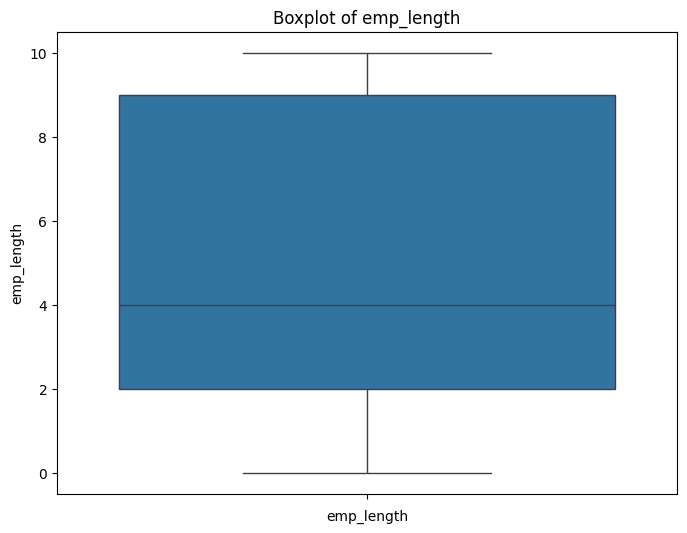

In [213]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['emp_length'])
plt.title('Boxplot of emp_length')  # Set title
plt.xlabel('emp_length')  # Set x-axis label
plt.show()

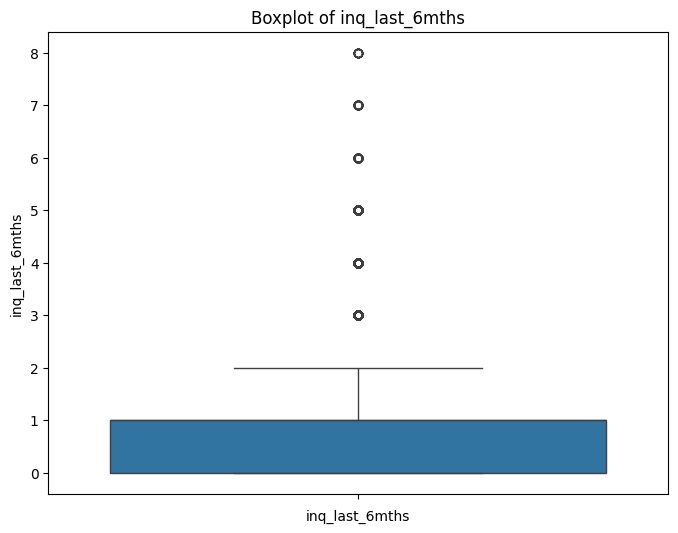

In [214]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['inq_last_6mths'])
plt.title('Boxplot of inq_last_6mths')  # Set title
plt.xlabel('inq_last_6mths')  # Set x-axis label
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['pub_rec'])
plt.title('Boxplot of pub_rec')  # Set title
plt.xlabel('pub_rec')  # Set x-axis label
plt.show()

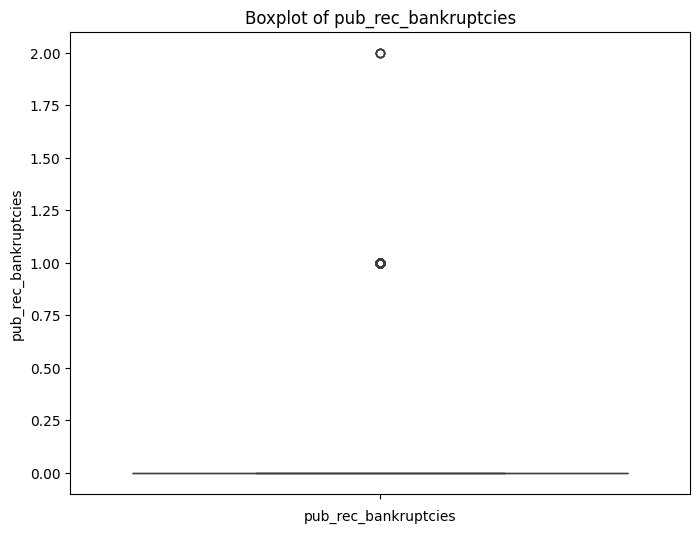

In [215]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['pub_rec_bankruptcies'])
plt.title('Boxplot of pub_rec_bankruptcies')  # Set title
plt.xlabel('pub_rec_bankruptcies')  # Set x-axis label
plt.show()

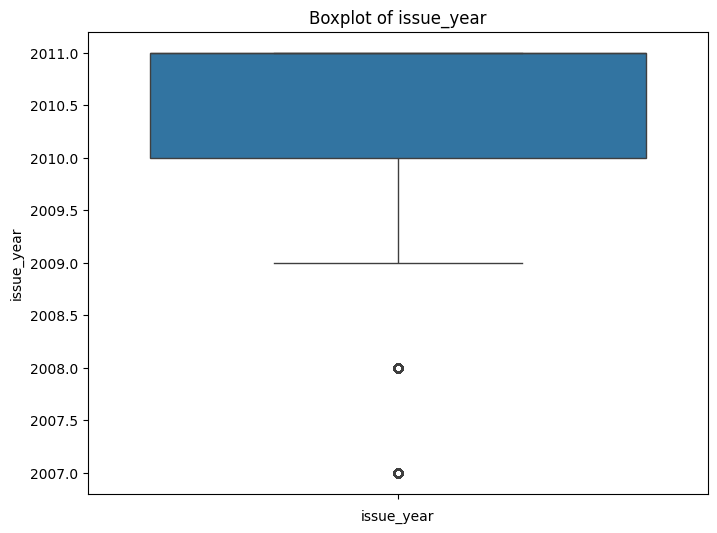

In [216]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(df1['issue_year'])
plt.title('Boxplot of issue_year')  # Set title
plt.xlabel('issue_year')  # Set x-axis label
plt.show()

## **Bivariate Analysis**

* Identify the pairs of columns to be Analyzed
* Generate cattered plots plots and identify the dependency


In [ ]:
#collection recovery fee analysis
df1.collection_recovery_fee.value_counts()  #collection_recovery_fee

In [ ]:
sns.histplot(x=df1['collection_recovery_fee'], bins = range(0,10,1) )
plt.show()

## **Multivariate Analysis**

## For all Numeric columns plot a heat map and identify the corelation


* *Correlation represents strength of relationship between variables*
* *Correlation lies in the range of -1 to 1*
* *Negative correlation  (0 to -1) shows inverse relationship*
* *Positive correlation (0 to 1) shows direct relationship*
* *0 correlation represents no relationship. *italicized text*

## Univariate Analysis --> Analysis with Single variable
--> Mean, Median, Max, Min, Std, Variance, Count
--> Distribution (Histogram,Distplot,Countplot,boxplot)
## Bivaraite Analsyis --> Analysis with two variables
--> Relationship between two variables (Scatterplot, boxplot,barplot etc)
## Multivariate Analysis
--> Relationship between more than variables (Heatmap etc)

Coomit at 12.15

Commiting at 12.10